Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

* Detect problems (missing values, outliers, etc)
    * Nonsense Values
    * Missing Values
        * Discuss best technique for filling in
    * Outliers
        * Discuss potential effects
        * Select appropriate method to deal with

* Explore
    * Univariate and multivariate exploration
        * Focus on target variable
        * Find relevant variables

* Feature engineering
    * Select suite of ideal variables for modeling
    * Discard extra correlated variables
    * Discard irrelevant variables
    
* Summarize your findings
    * Practice expressing to non-tech people
    * Use effective visualization

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

pd.set_option('display.max_columns', None)

# warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

print(pd.__version__)

1.0.3


Creating source DataFrame

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df_source = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

Making copy of source and altering column names.

In [3]:
life_df = life_df_source.copy()

# Stripping column names of whitespace
for column_name in life_df.columns:
    life_df.rename({column_name: column_name.strip().lower()}, axis=1, inplace=True)
# Renaming columns
better_column_names = {'life expectancy': 'life_expect',
                      'adult mortality': 'adult_mort',
                      'infant deaths': 'infant_deaths',
                      'percentage expenditure': 'perc_expend',
                      'hepatitis b': 'hep_b',
                      'under-five deaths': '<5_deaths',
                      'total expenditure': 'total_expend',
                      'population': 'pop',
                      'thinness  1-19 years': 'thin<20',
                      'thinness 5-9 years': 'thin<10',
                      'income composition of resources': 'income'}
life_df.rename(better_column_names, axis=1, inplace=True)

print(life_df.shape)
life_df.head()

(2938, 22)


,country,year,status,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_df.describe()

,year,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [158]:
not2015_df = life_df[life_df.year != 2015]

not2015_df[not2015_df.alcohol.isnull()]

,country,year,status,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling
1743,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,NaN,0,55.7,0,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1959,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,NaN,39,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,NaN,40,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,NaN,40,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,NaN,41,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [159]:
life_df.loc[1740:1745,['country','year','alcohol']]

,country,year,alcohol
1740,Montenegro,2008,6.17
1741,Montenegro,2007,4.98
1742,Montenegro,2006,5.38
1743,Montenegro,2005,NaN
1744,Montenegro,2004,0.01
1745,Montenegro,2003,0.01


# Data Cleaning

## Variable Types

In [5]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        2938 non-null   object 
 1   year           2938 non-null   int64  
 2   status         2938 non-null   object 
 3   life_expect    2928 non-null   float64
 4   adult_mort     2928 non-null   float64
 5   infant_deaths  2938 non-null   int64  
 6   alcohol        2744 non-null   float64
 7   perc_expend    2938 non-null   float64
 8   hep_b          2385 non-null   float64
 9   measles        2938 non-null   int64  
 10  bmi            2904 non-null   float64
 11  <5_deaths      2938 non-null   int64  
 12  polio          2919 non-null   float64
 13  total_expend   2712 non-null   float64
 14  diphtheria     2919 non-null   float64
 15  hiv/aids       2938 non-null   float64
 16  gdp            2490 non-null   float64
 17  pop            2286 non-null   float64
 18  thin<20 

I don't notice anything inherently wrong with data types.

## Missing Values

There are some empty values along with a recurring `nan` value.

In [6]:
life_df.isnull().sum()

country            0
year               0
status             0
life_expect       10
adult_mort        10
infant_deaths      0
alcohol          194
perc_expend        0
hep_b            553
measles            0
bmi               34
<5_deaths          0
polio             19
total_expend     226
diphtheria        19
hiv/aids           0
gdp              448
pop              652
thin<20           34
thin<10           34
income           167
schooling        163
dtype: int64

Interpolating as much missing data as possible by grouping them by country and filling missing data based on linear trends.

In [7]:
life_df_inter = life_df.groupby(['country'], sort=False).apply(
    lambda group: group.interpolate(method='linear', limit_direction='both'))

In [8]:
life_df_inter.shape

(2938, 22)

Dataframe size is still intact, and the number of null-values has gone slightly, most notably in the `alcohol` category.

In [9]:
life_df_inter.isnull().sum()

country            0
year               0
status             0
life_expect       10
adult_mort        10
infant_deaths      0
alcohol           17
perc_expend        0
hep_b            144
measles            0
bmi               34
<5_deaths          0
polio              0
total_expend      32
diphtheria         0
hiv/aids           0
gdp              405
pop              648
thin<20           34
thin<10           34
income           167
schooling        163
dtype: int64

In [10]:
life_df_inter.isnull().sum()*100/life_df_inter.isnull().count()

country           0.000000
year              0.000000
status            0.000000
life_expect       0.340368
adult_mort        0.340368
infant_deaths     0.000000
alcohol           0.578625
perc_expend       0.000000
hep_b             4.901293
measles           0.000000
bmi               1.157250
<5_deaths         0.000000
polio             0.000000
total_expend      1.089176
diphtheria        0.000000
hiv/aids          0.000000
gdp              13.784888
pop              22.055820
thin<20           1.157250
thin<10           1.157250
income            5.684139
schooling         5.547992
dtype: float64

However, there are still large chunks of missing data that could not be interpolated, like this chunk with the `gdp`, `pop`, `income`, and `schooling` categories.

In [11]:
life_df_inter.iloc[433:448]

,country,year,status,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling
433,Côte d'Ivoire,2015,Developing,53.3,397.0,57,1.58,0.0,83.0,65,28.0,79,81.0,5.285,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
434,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,27.4,80,76.0,5.720,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
435,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,26.8,81,79.0,5.810,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
436,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,26.2,82,83.0,6.140,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
437,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,25.6,83,58.0,6.420,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
438,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,25.0,84,81.0,6.320,85.0,3.3,NaN,NaN,6.3,6.2,NaN,NaN
439,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,24.4,84,77.0,6.410,81.0,3.7,NaN,NaN,6.5,6.4,NaN,NaN
440,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,23.8,85,58.0,6.210,74.0,4.1,NaN,NaN,6.6,6.6,NaN,NaN
441,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,23.2,87,75.0,6.350,76.0,5.3,NaN,NaN,6.8,6.7,NaN,NaN
442,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,22.6,89,76.0,5.870,77.0,5.8,NaN,NaN,7.0,6.9,NaN,NaN


The cleanest way is to remove all the null values.  I believe there is enough data left.

In [12]:
life_df_inter.dropna(inplace=True)

In [13]:
life_df_inter.isnull().sum()

country          0
year             0
status           0
life_expect      0
adult_mort       0
infant_deaths    0
alcohol          0
perc_expend      0
hep_b            0
measles          0
bmi              0
<5_deaths        0
polio            0
total_expend     0
diphtheria       0
hiv/aids         0
gdp              0
pop              0
thin<20          0
thin<10          0
income           0
schooling        0
dtype: int64

## Outliers

### Box-and-Whisker and Histogram

In [14]:
out_list = ['life_expect', 'adult_mort', 'infant_deaths', 'alcohol', 
            'perc_expend', 'hep_b', 'measles', 'bmi', '<5_deaths', 
            'polio', 'total_expend', 'diphtheria', 'hiv/aids', 'gdp', 
            'pop', 'thin<20', 'thin<10', 'income', 'schooling']

In [15]:
def visual_outliers(outlier_list):
    '''Outputs two charts for each listed category
    Box and Whisker plot
    Histogram
    To help visually identify which categories have outliers.'''
    size = len(outlier_list)
    plt.figure(figsize=(20, 5*size))
    
    for i in range(len(outlier_list)):
        col_name = outlier_list[i]        
        
        plt.subplot(size,2,(i*2)+1)
        plt.boxplot(life_df_inter[col_name])
        plt.title('Boxplot of {}'.format(col_name))
        
        plt.subplot(size,2,(i*2)+2)
        plt.hist(life_df_inter[col_name])
        plt.title("Histogram of {}".format(col_name))
    
    plt.show()

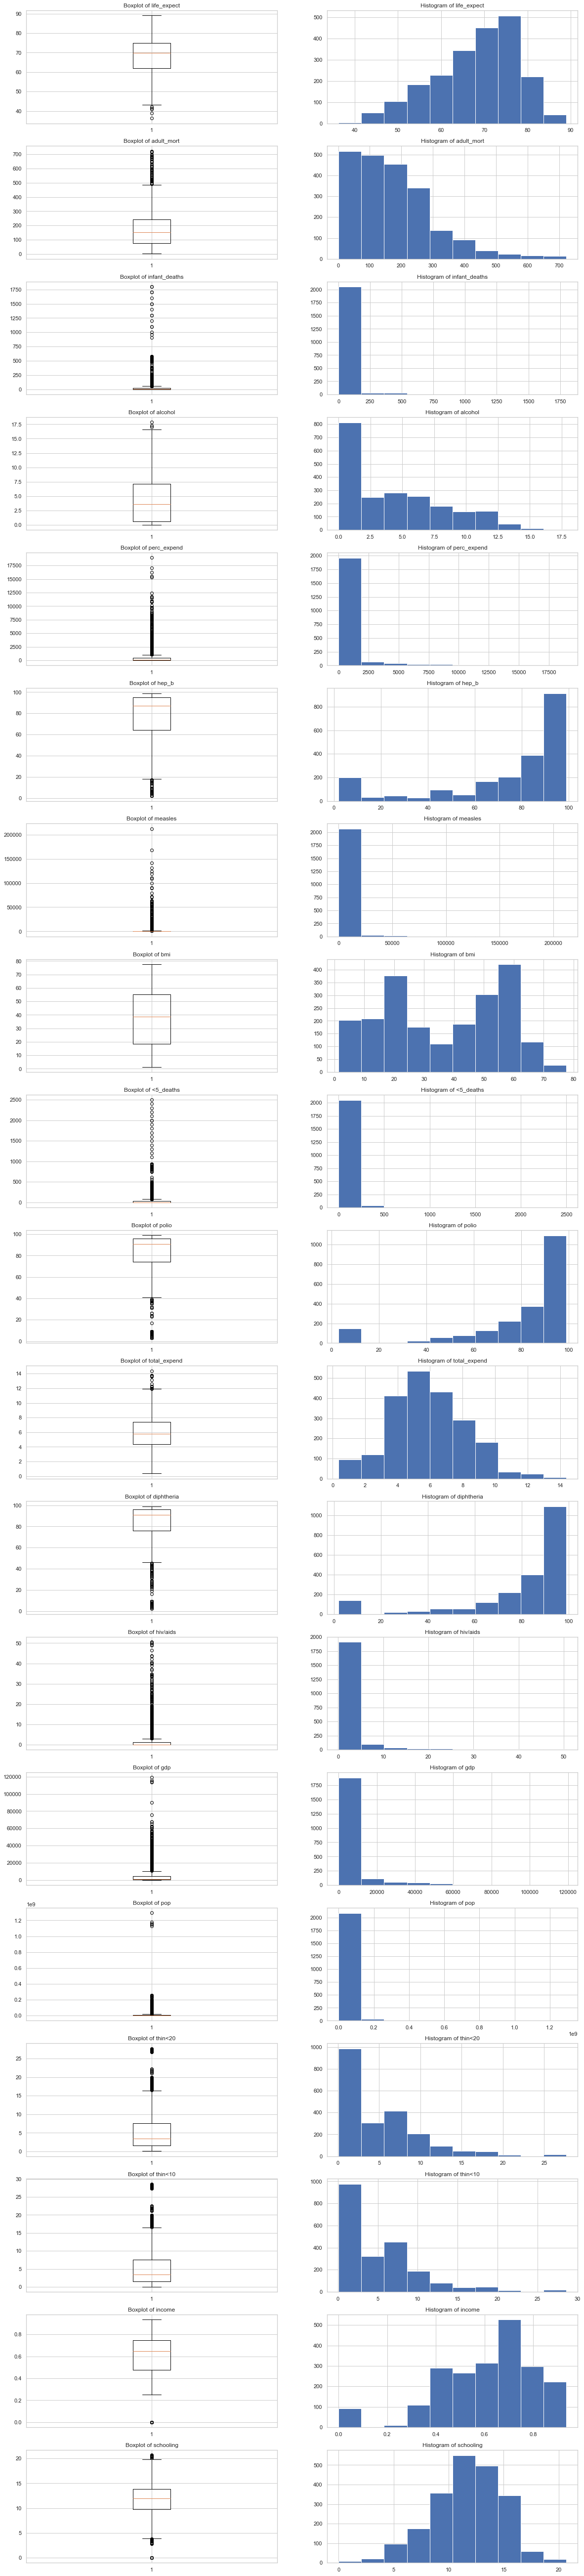

In [16]:
visual_outliers(out_list)

### Tukey

In [17]:
# Calculate number of outliers and percentage in each variale using Tukey's method.

def outliers_tukey(col_list):
    for variable in col_list:
        q75, q25 = np.percentile(life_df_inter[variable], [75, 25])
        iqr = q75 - q25

        min_val = q25 - (iqr*1.5)
        max_val = q75 + (iqr*1.5)
        print('Number of outliers and percentage in {} : {} and {}'.format
              (variable, len((np.where((life_df_inter[variable] > max_val) |
                                (life_df_inter[variable] < min_val))[0])), 
                        len((np.where((life_df_inter[variable] > max_val) |
                                (life_df_inter[variable] < min_val))[0]))*100/1987))
outliers_tukey(out_list)

Number of outliers and percentage in life_expect : 5 and 0.25163563160543534
Number of outliers and percentage in adult_mort : 61 and 3.0699547055863112
Number of outliers and percentage in infant_deaths : 225 and 11.32360342224459
Number of outliers and percentage in alcohol : 3 and 0.1509813789632612
Number of outliers and percentage in perc_expend : 251 and 12.632108706592854
Number of outliers and percentage in hep_b : 226 and 11.373930548565676
Number of outliers and percentage in measles : 393 and 19.778560644187216
Number of outliers and percentage in bmi : 0 and 0.0
Number of outliers and percentage in <5_deaths : 251 and 12.632108706592854
Number of outliers and percentage in polio : 172 and 8.656265727226975
Number of outliers and percentage in total_expend : 13 and 0.6542526421741318
Number of outliers and percentage in diphtheria : 222 and 11.17262204328133
Number of outliers and percentage in hiv/aids : 339 and 17.060895822848515
Number of outliers and percentage in gdp : 

Removing Outliers in the variables using Winsorization technique

- life_expect
- adult_mort
- infant_deaths
- alcohol
- perc_expend
- hep_b 
- measles
- <5_deaths
- polio
- total_expend
- diphtheria
- hiv/aids
- gdp
- pop
- thin<20
- thin<10
- income
- schooling

#### Winsorize

In [18]:
from scipy.stats.mstats import winsorize

winsorized_dict = {}  # Winsorized dictionary

In [19]:
def Winsorize_col(col, low, high):
    plt.figure(figsize=(18,6))

    plt.subplot(1,2,1)
    original = life_df_inter[col]
    plt.boxplot(original)
    plt.title('original {}'.format(col))

    plt.subplot(1,2,2)
    winsorized = winsorize(life_df_inter[col],(low, high)) # Winsorize
    winsorized_dict[col] = winsorized # Add results to dictionary
    plt.boxplot(winsorized) # Plot winsorized results
    plt.title('winsorized {}'.format(col))

    plt.show()

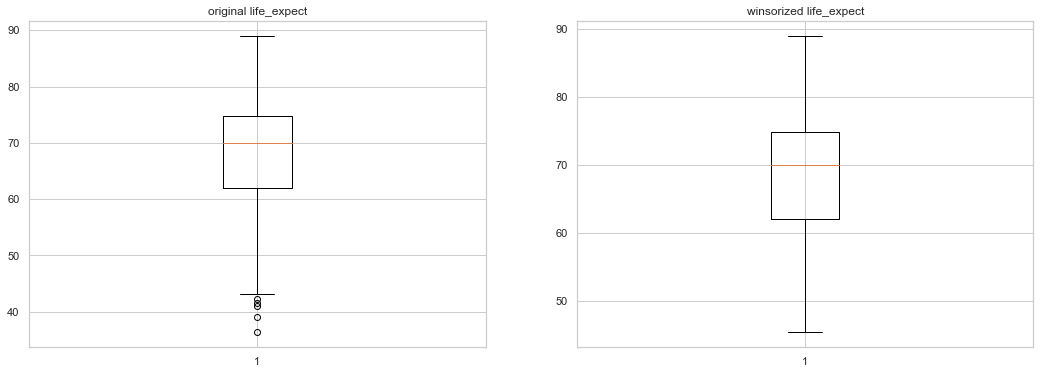

In [20]:
Winsorize_col('life_expect', 0.01, 0)

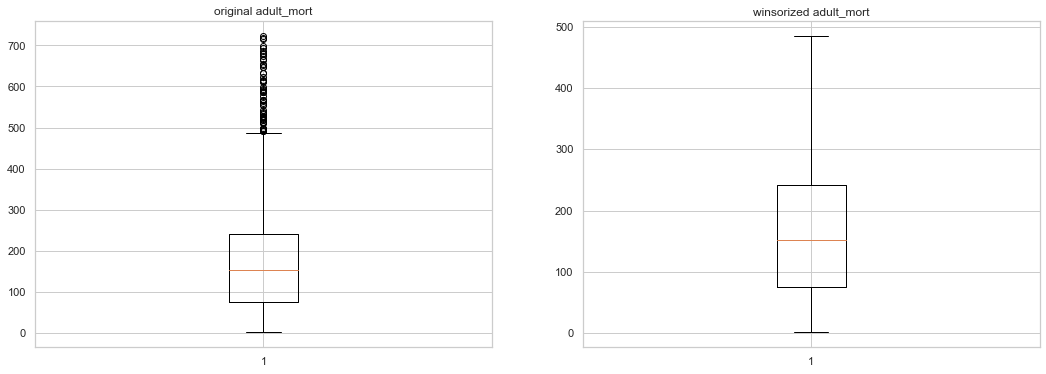

In [21]:
Winsorize_col('adult_mort', 0, 0.03)

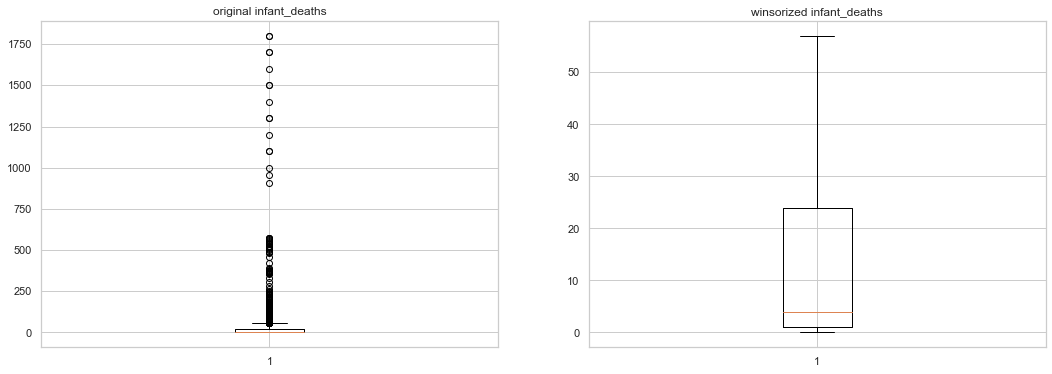

In [22]:
Winsorize_col('infant_deaths', 0, 0.11)

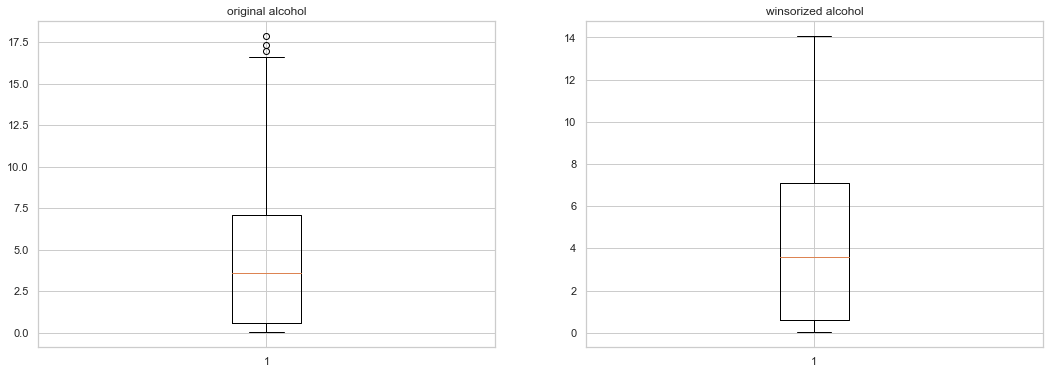

In [23]:
Winsorize_col('alcohol', 0, 0.01)

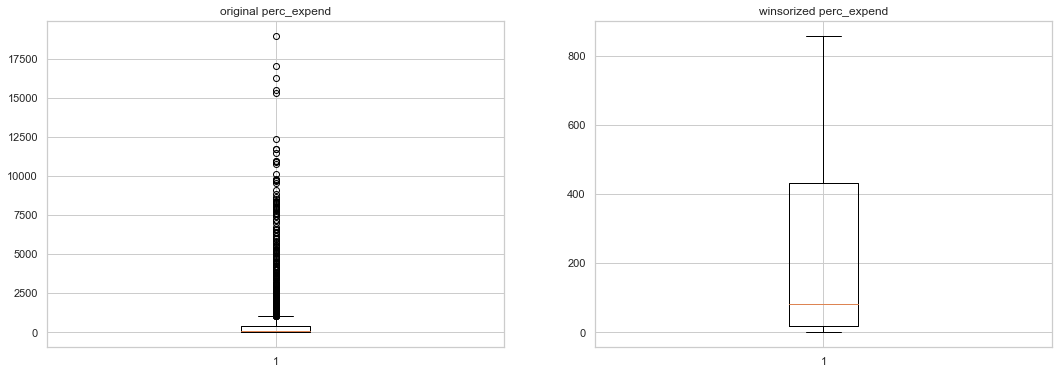

In [24]:
Winsorize_col('perc_expend', 0, 0.14)

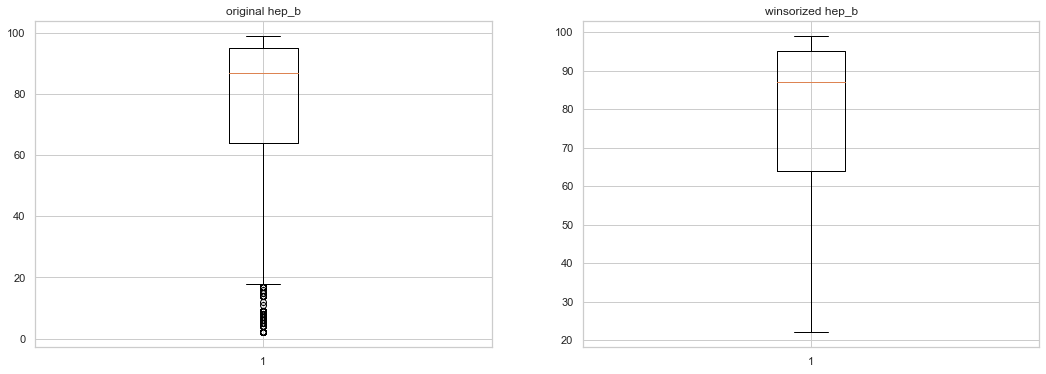

In [25]:
Winsorize_col('hep_b', 0.11, 0)

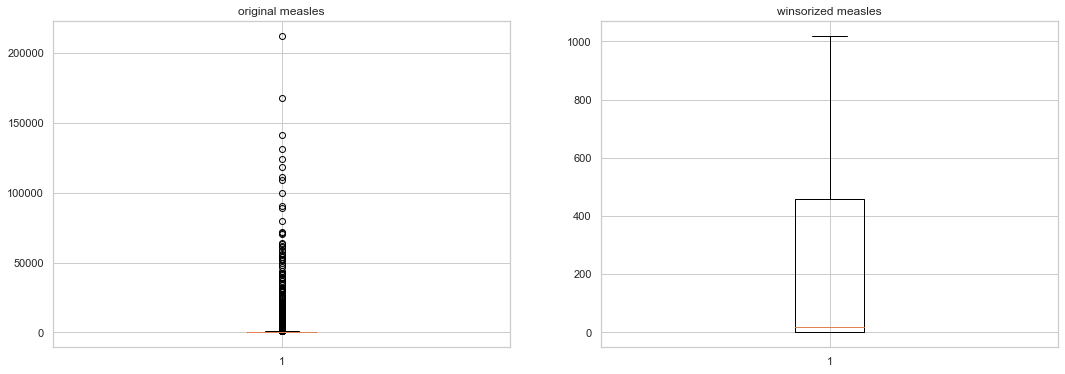

In [26]:
Winsorize_col('measles', 0, 0.19)

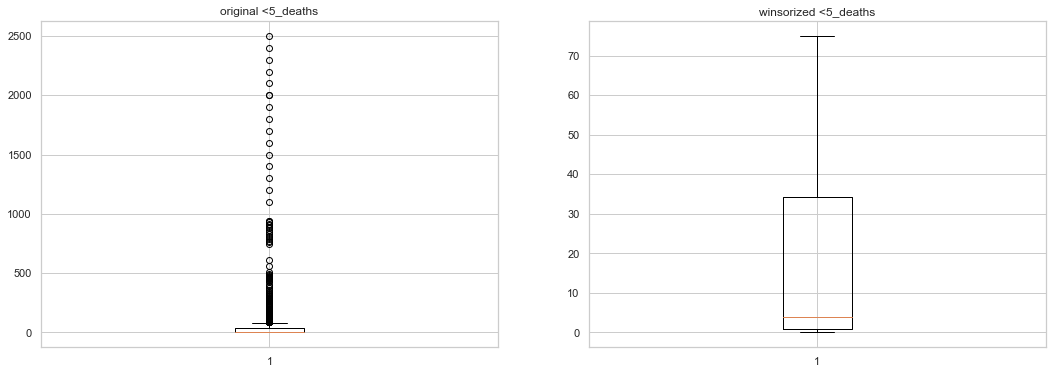

In [27]:
Winsorize_col('<5_deaths', 0, 0.14)

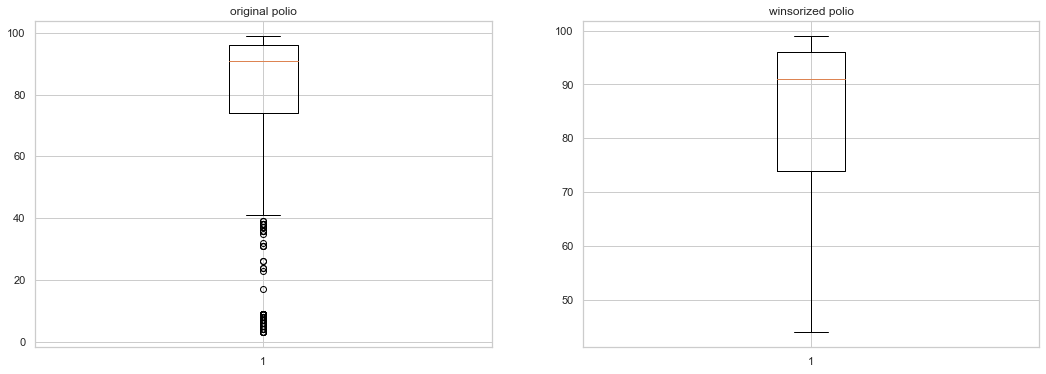

In [28]:
Winsorize_col('polio', 0.09, 0)

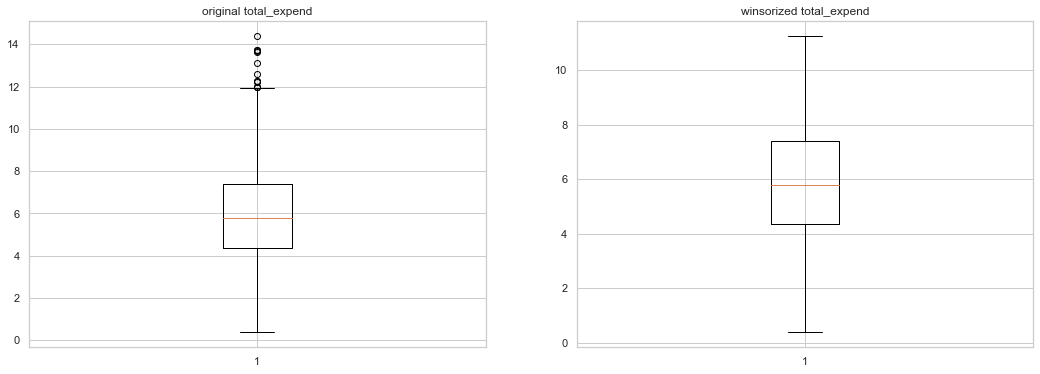

In [29]:
Winsorize_col('total_expend', 0, 0.02)

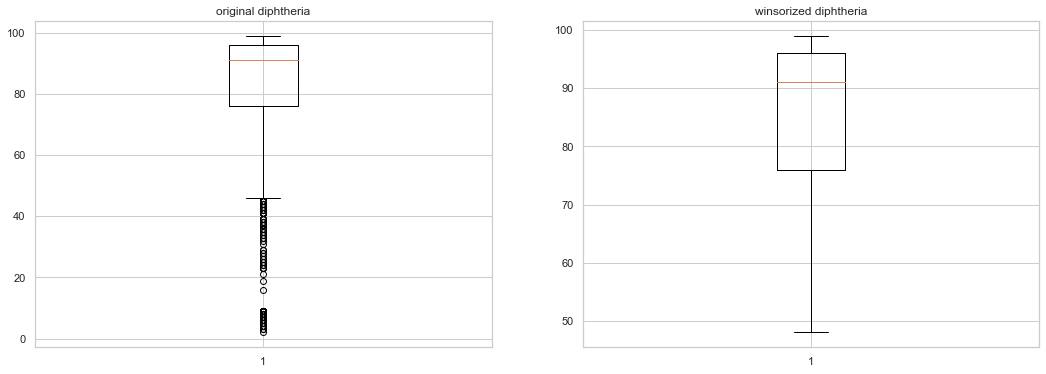

In [30]:
Winsorize_col('diphtheria', 0.11, 0)

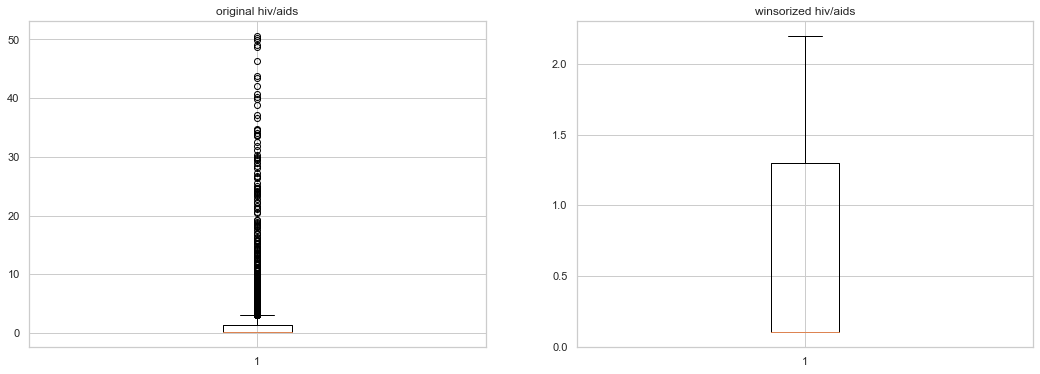

In [31]:
Winsorize_col('hiv/aids', 0, 0.19)

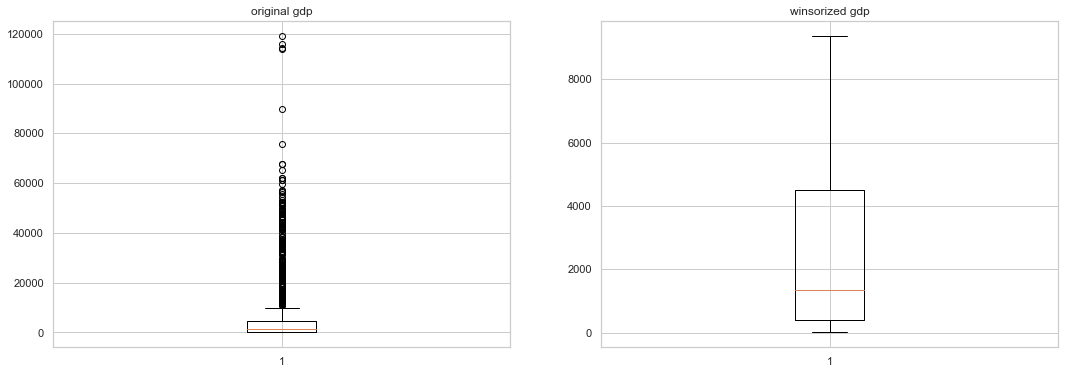

In [32]:
Winsorize_col('gdp', 0, 0.13)

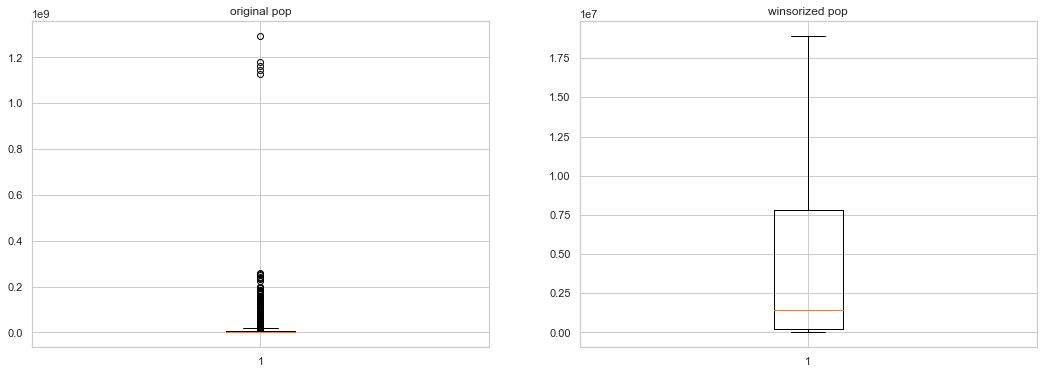

In [56]:
Winsorize_col('pop', 0, 0.13)

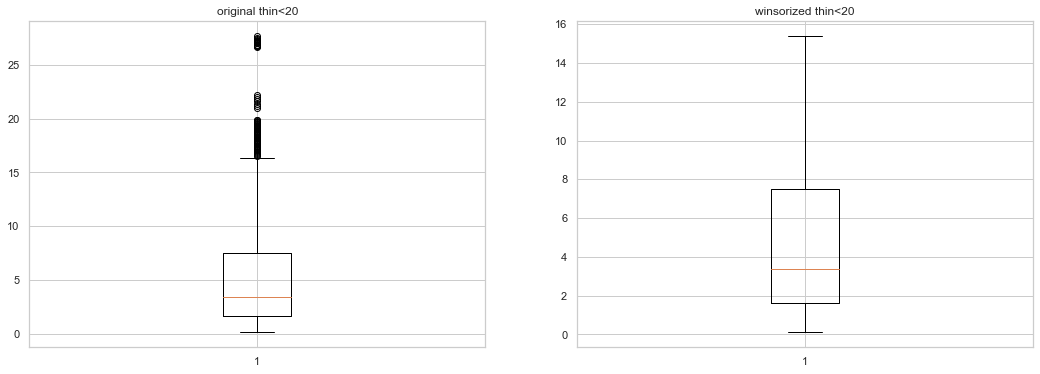

In [34]:
Winsorize_col('thin<20', 0, 0.04)

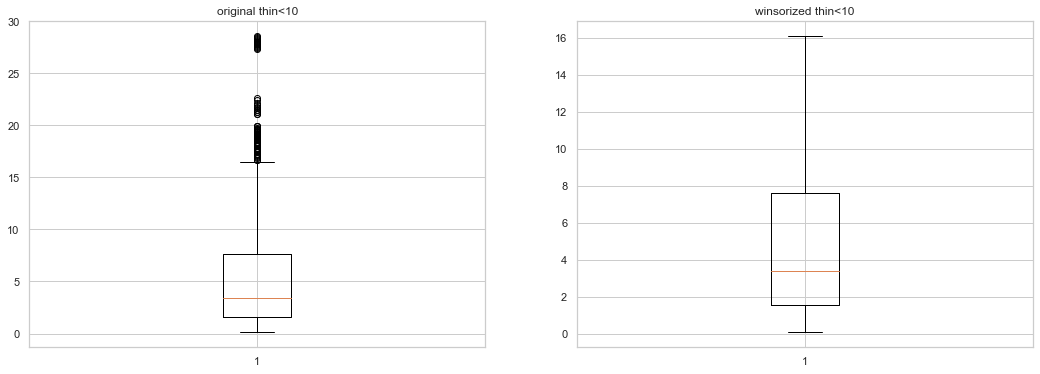

In [35]:
Winsorize_col('thin<10', 0, 0.04)

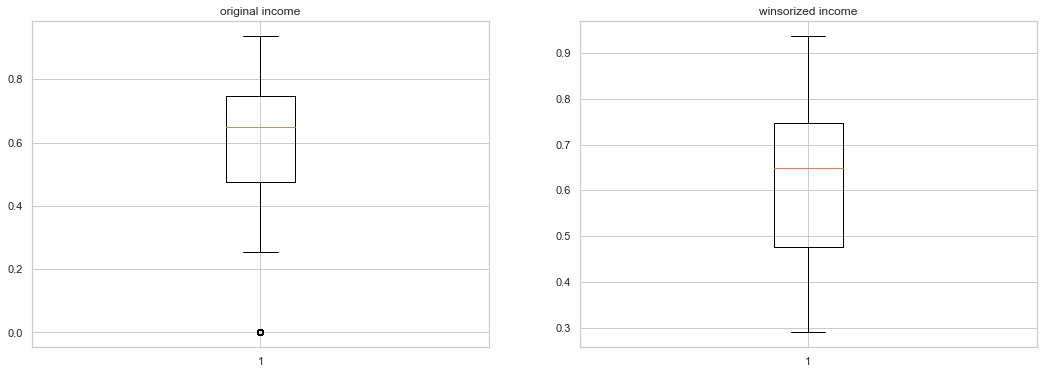

In [36]:
Winsorize_col('income', 0.05, 0)

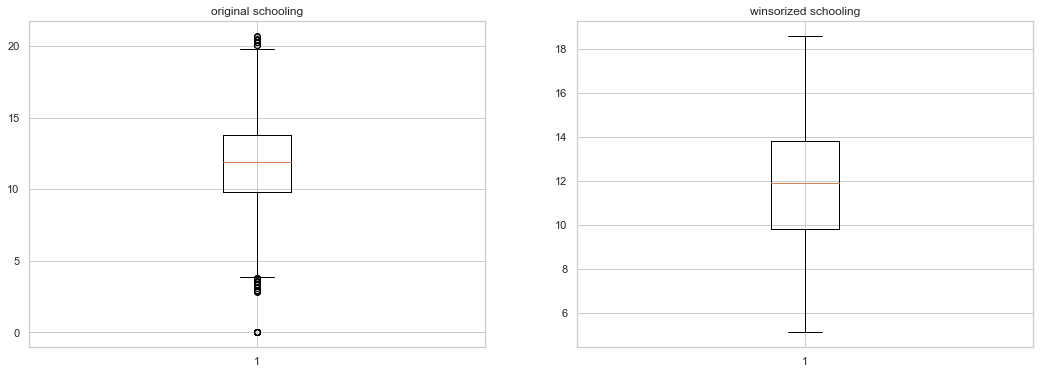

In [37]:
Winsorize_col('schooling', 0.03, 0.01)

In [57]:
for variable, i in winsorized_dict.items():
    q75, q25 = np.percentile(i, [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers in {} after winsorization : {}".format(variable, 
        len(np.where((i > max_val) | (i < min_val))[0])))

Number of outliers in life_expect after winsorization : 0
Number of outliers in adult_mort after winsorization : 0
Number of outliers in infant_deaths after winsorization : 0
Number of outliers in alcohol after winsorization : 0
Number of outliers in perc_expend after winsorization : 0
Number of outliers in hep_b after winsorization : 0
Number of outliers in measles after winsorization : 0
Number of outliers in <5_deaths after winsorization : 0
Number of outliers in polio after winsorization : 0
Number of outliers in total_expend after winsorization : 0
Number of outliers in diphtheria after winsorization : 0
Number of outliers in hiv/aids after winsorization : 0
Number of outliers in gdp after winsorization : 0
Number of outliers in pop after winsorization : 0
Number of outliers in thin<20 after winsorization : 0
Number of outliers in thin<10 after winsorization : 0
Number of outliers in income after winsorization : 0
Number of outliers in schooling after winsorization : 0


In [39]:
win_life_df = life_df_inter.copy()

In [40]:
# Adding columns
for variable, i in winsorized_dict.items():
    win_life_df['win_' + variable] = i

In [41]:
win_life_df.head()

,country,year,status,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling,win_life_expect,win_adult_mort,win_infant_deaths,win_alcohol,win_perc_expend,win_hep_b,win_measles,win_<5_deaths,win_polio,win_total_expend,win_diphtheria,win_hiv/aids,win_gdp,win_pop,win_thin<20,win_thin<10,win_income,win_schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,263.0,57,0.01,71.279624,65.0,1019,75,44.0,8.16,65.0,0.1,584.259210,33736494.0,15.4,16.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,271.0,57,0.01,73.523582,62.0,492,75,58.0,8.18,62.0,0.1,612.696514,327582.0,15.4,16.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,268.0,57,0.01,73.219243,64.0,430,75,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.4,16.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,272.0,57,0.01,78.184215,67.0,1019,75,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.4,16.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,275.0,57,0.01,7.097109,68.0,1019,75,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.4,16.1,0.454,9.5


In [42]:
win_life_df.shape

(2128, 40)

## Exploratory Analysis

In [43]:
win_life_df.describe()

,year,life_expect,adult_mort,infant_deaths,alcohol,perc_expend,hep_b,measles,bmi,<5_deaths,polio,total_expend,diphtheria,hiv/aids,gdp,pop,thin<20,thin<10,income,schooling,win_life_expect,win_adult_mort,win_infant_deaths,win_alcohol,win_perc_expend,win_hep_b,win_measles,win_<5_deaths,win_polio,win_total_expend,win_diphtheria,win_hiv/aids,win_gdp,win_pop,win_thin<20,win_thin<10,win_income,win_schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,68.139709,174.300282,35.902726,4.348240,640.072009,74.270207,2657.467105,36.691964,49.817199,80.335996,5.899370,80.477444,2.173637,5402.417263,1.339761e+07,5.107895,5.177538,0.607481,11.691823,68.159492,171.462876,14.904605,4.336248,254.290754,75.791353,273.123590,20.176222,82.969455,5.884464,83.571898,0.685620,2906.752778,7.081456e+06,4.925188,4.998308,0.620008,11.723261
std,4.610856,9.610700,129.759274,136.224732,3.998403,1710.798798,28.796545,11912.236064,19.843731,185.152708,24.494233,2.305911,24.478990,5.827273,11376.222749,6.315772e+07,4.711951,4.805378,0.203404,3.203263,9.559003,121.058424,19.832984,3.965826,308.043447,25.394354,404.778893,27.110380,17.585482,2.265966,16.569567,0.849298,3216.881525,1.157724e+07,4.124978,4.212929,0.172211,3.065808
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,45.300000,1.000000,0.000000,0.010000,0.000000,22.000000,0.000000,0.000000,44.000000,0.370000,48.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.290000,5.100000
25%,2003.750000,62.000000,76.000000,1.000000,0.590000,19.883256,64.000000,0.000000,18.400000,1.000000,74.000000,4.357500,76.000000,0.100000,393.276186,1.989615e+05,1.600000,1.600000,0.476750,9.800000,62.000000,76.000000,1.000000,0.590000,19.883256,64.000000,0.000000,1.000000,74.000000,4.357500,76.000000,0.100000,393.276186,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,69.950000,152.000000,4.000000,3.600000,83.677991,87.000000,20.000000,38.850000,4.000000,91.000000,5.790000,91.000000,0.100000,1353.159574,1.425337e+06,3.400000,3.400000,0.649500,11.900000,69.950000,152.000000,4.000000,3.600000,83.677991,87.000000,20.000000,4.000000,91.000000,5.790000,91.000000,0.100000,1353.159574,1.425337e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,74.800000,241.250000,24.000000,7.115000,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.390000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000,74.800000,241.250000,24.000000,7.115000,431.365149,95.000000,459.250000,34.250000,96.000000,7.390000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000,89.000000,485.000000,57.000000,14.070000,857.130704,99.000000,1019.000000,75.000000,99.000000,11.250000,99.000000,2.200000,9365.742468,3.987153e+07,15.400000,16.100000,0.937000,18.600000


In [44]:
# Distribution of each numerical variable

all_col = ['life_expect', 'win_life_expect',
          'adult_mort', 'win_adult_mort',
          'infant_deaths', 'win_infant_deaths',
          'alcohol', 'win_alcohol',
          'perc_expend', 'win_perc_expend',
          'hep_b', 'win_hep_b',
          'measles', 'win_measles',
          '<5_deaths', 'win_<5_deaths',
          'polio', 'win_polio',
          'total_expend', 'win_total_expend',
          'diphtheria', 'win_diphtheria',
          'hiv/aids', 'win_hiv/aids',
          'gdp', 'win_gdp',
          'pop', 'win_pop',
          'thin<20', 'win_thin<20',
          'thin<10', 'win_thin<10',
          'income', 'win_income',
          'schooling', 'win_schooling']

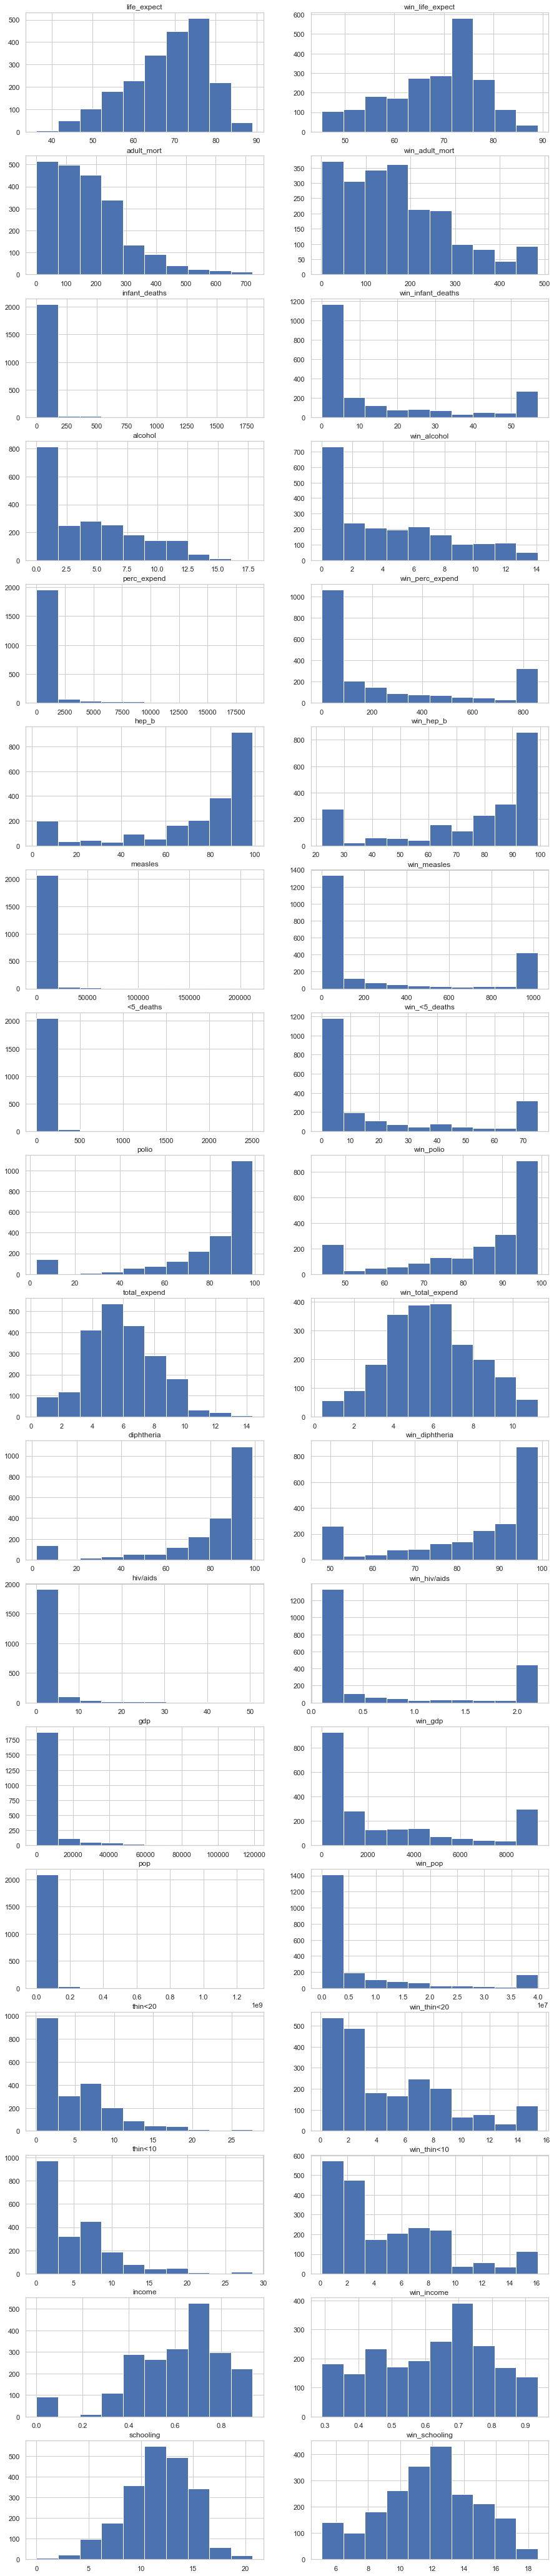

In [45]:
plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18, 2, i+1)
    plt.hist(win_life_df[all_col[i]])
    plt.title(all_col[i])
    
plt.show()

win_life_expect, win_total_expend,win_schooling aresomewhat normally distributed.

In [46]:
win_life_df.describe(include=['O'])

,country,status
count,2128,2128
unique,133,2
top,Cambodia,Developing
freq,16,1824


life_expect w.r.t. Status using bar plot

In [47]:
def AutoLabel(rects): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

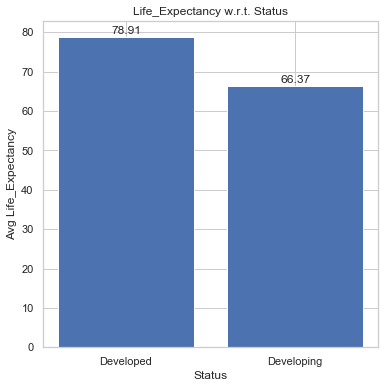

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
bars = plt.bar(win_life_df.groupby('status')['status'].count().index,
       round(win_life_df.groupby('status')['win_life_expect'].mean(), 2))
AutoLabel(bars)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Avg Life_Expectancy", fontsize=12)
plt.title("Life_Expectancy w.r.t. Status")

plt.show()

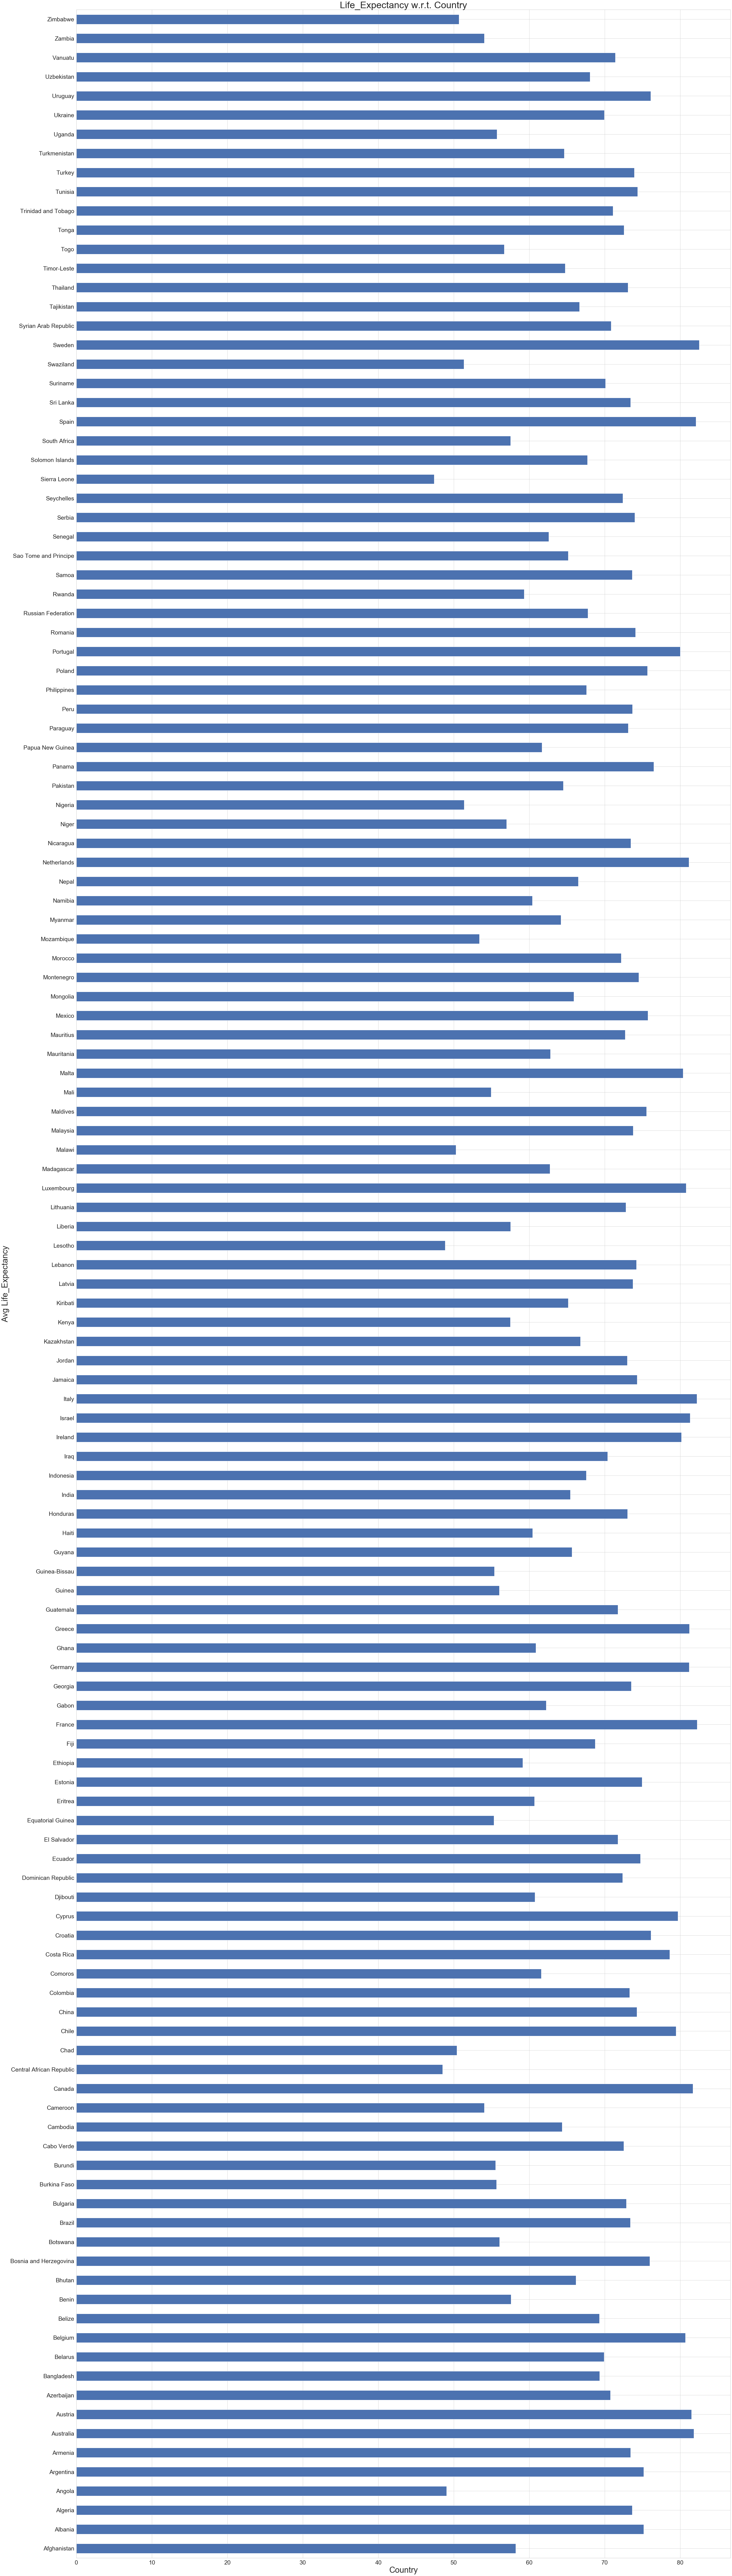

In [49]:
life_df_country = win_life_df.groupby('country')['win_life_expect'].mean()

life_df_country.plot(kind='barh', figsize=(50, 200), fontsize=25)
plt.title("Life_Expectancy w.r.t. Country", fontsize=40)
plt.xlabel("Country", fontsize=35)
plt.ylabel("Avg Life_Expectancy", fontsize=35)
plt.show()

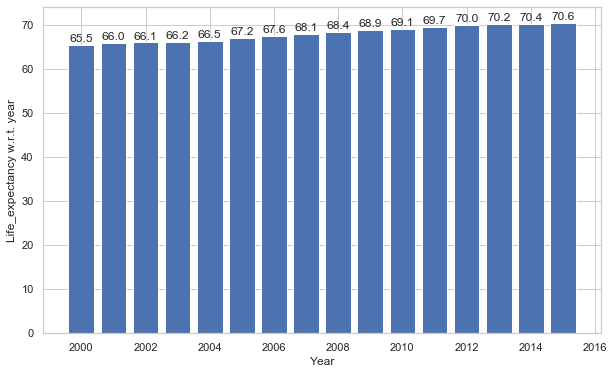

In [50]:
# Life_Expect w.r.t. Year using bar plot
fig, ax = plt.subplots(figsize=(10,6))

bar = plt.bar(win_life_df.groupby('year')['year'].count().index,
       round(win_life_df.groupby('year')['win_life_expect'].mean(),1))
AutoLabel(bar)
plt.xlabel('Year', fontsize=12)
plt.ylabel("Life_expectancy w.r.t. year")
plt.show()

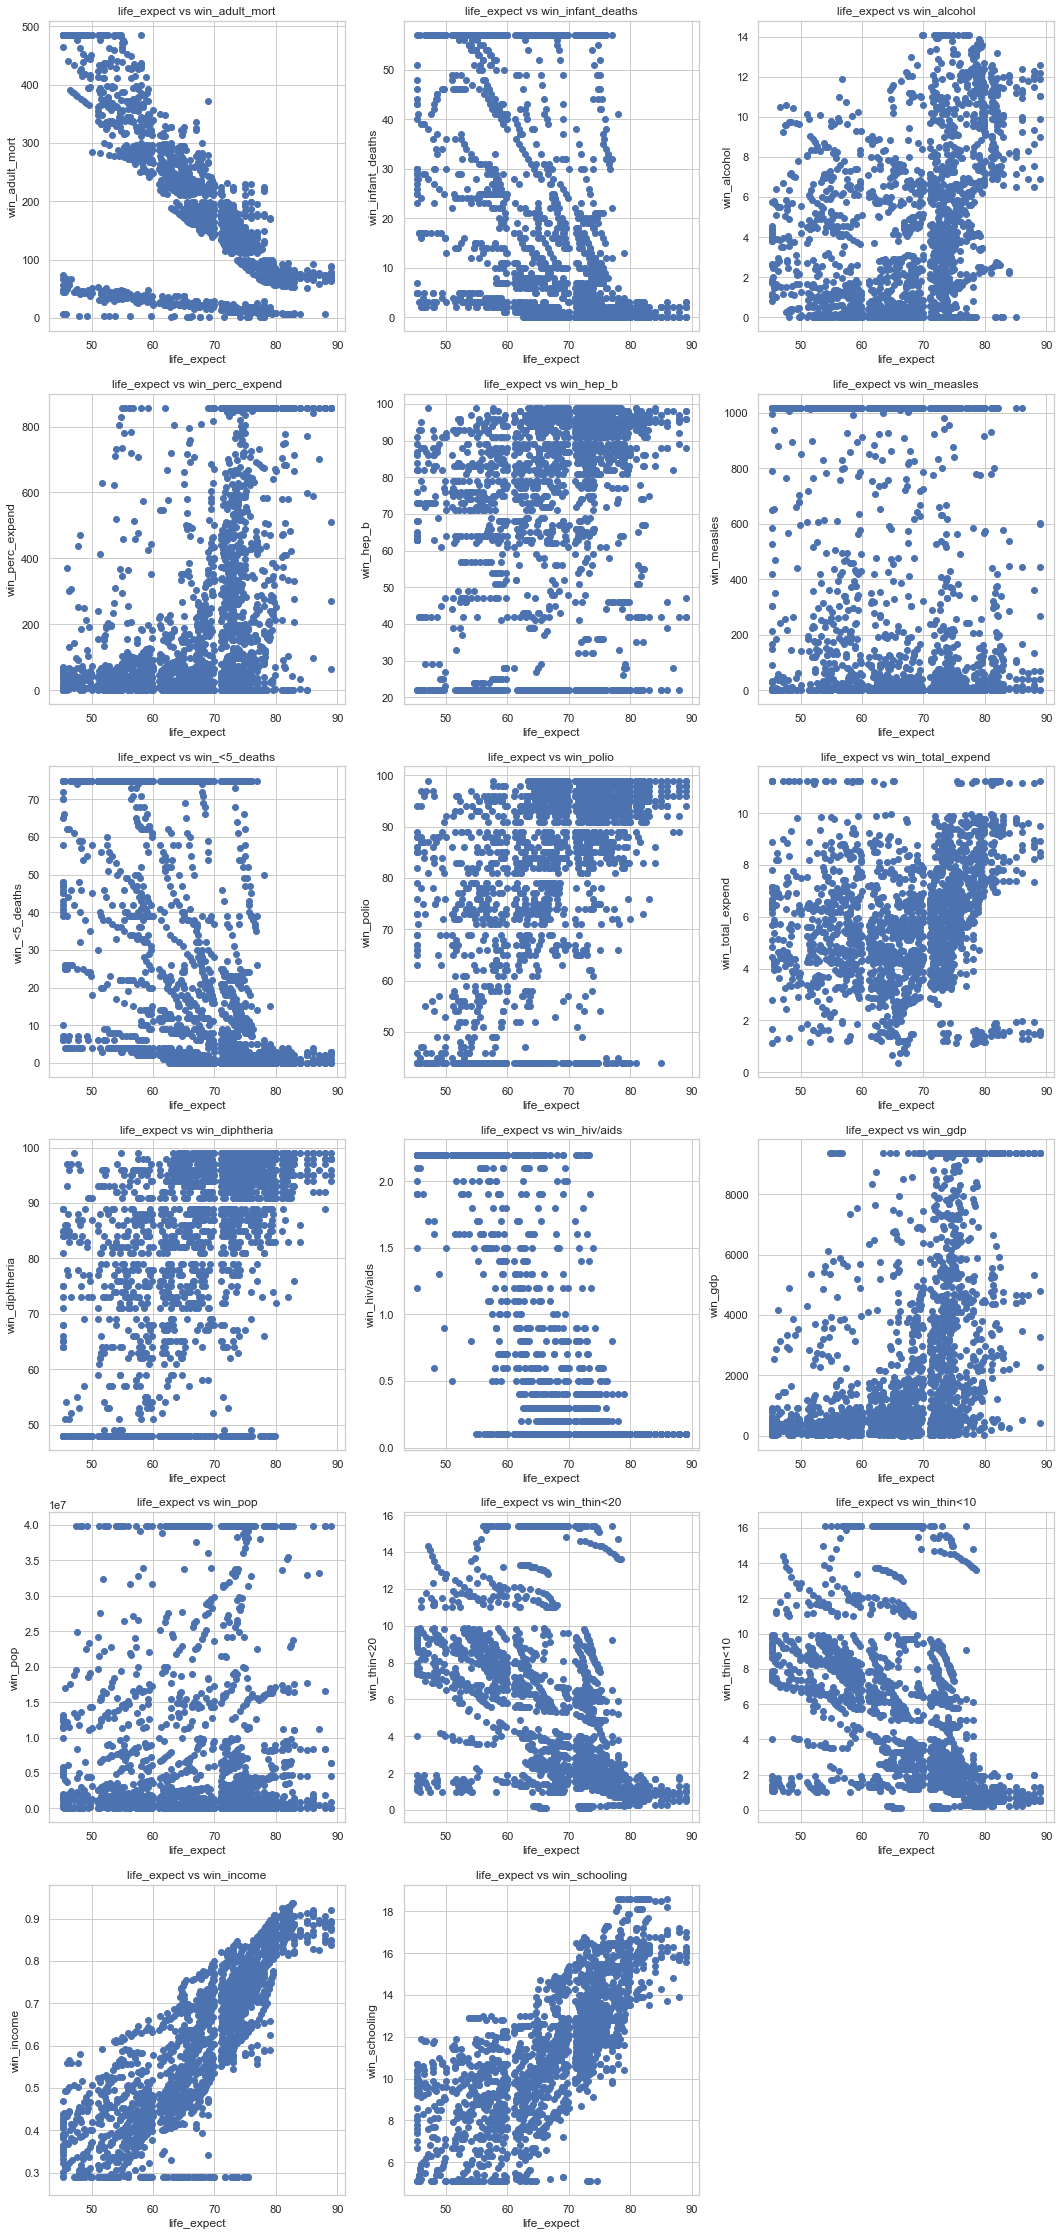

In [51]:
# Scatter plot between the target variable(win_life_expect) and all continous variables
plt.figure(figsize=(18,40))
for i in range((len(all_col)//2)-1):
    variable = all_col[i*2+3]
    plt.subplot(6,3,i+1)
    plt.scatter(win_life_df['win_life_expect'], win_life_df[variable])
    plt.xlabel('life_expect')
    plt.ylabel(variable)
    plt.title("life_expect vs {}".format(variable))
plt.show()

life_expect has somewhat negative relationshp with adult_mortality.

life-expect has positive relationshp with income and schooling.

Let's observe if there exists any correlation among the variable that are related to the target variable (win_life_expect).

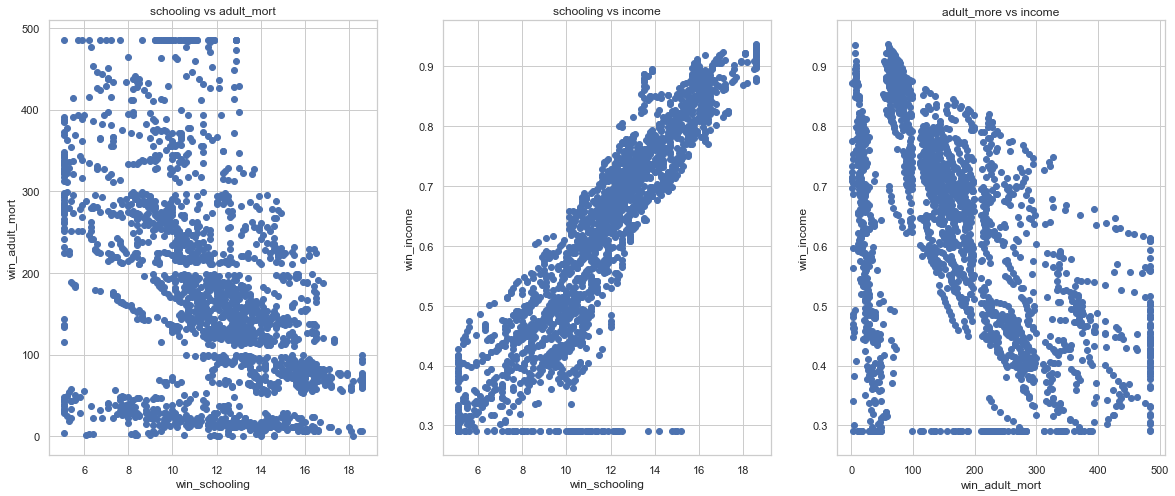

In [52]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(win_life_df['win_schooling'], win_life_df['win_adult_mort'])
plt.xlabel('win_schooling')
plt.ylabel('win_adult_mort')
plt.title('schooling vs adult_mort')

plt.subplot(1,3,2)
plt.scatter(win_life_df['win_schooling'], win_life_df['win_income'])
plt.xlabel('win_schooling')
plt.ylabel('win_income')
plt.title('schooling vs income')

plt.subplot(1,3,3)
plt.scatter(win_life_df['win_adult_mort'], win_life_df['win_income'])
plt.xlabel('win_adult_mort')
plt.ylabel('win_income')
plt.title('adult_more vs income')

plt.show()


It looks like they're all inter-related.

In [60]:
le_win = win_life_df.iloc[:,22:]
le_win['country'] = win_life_df['country']
le_win['year'] = win_life_df['year']
le_win['status'] = win_life_df['status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

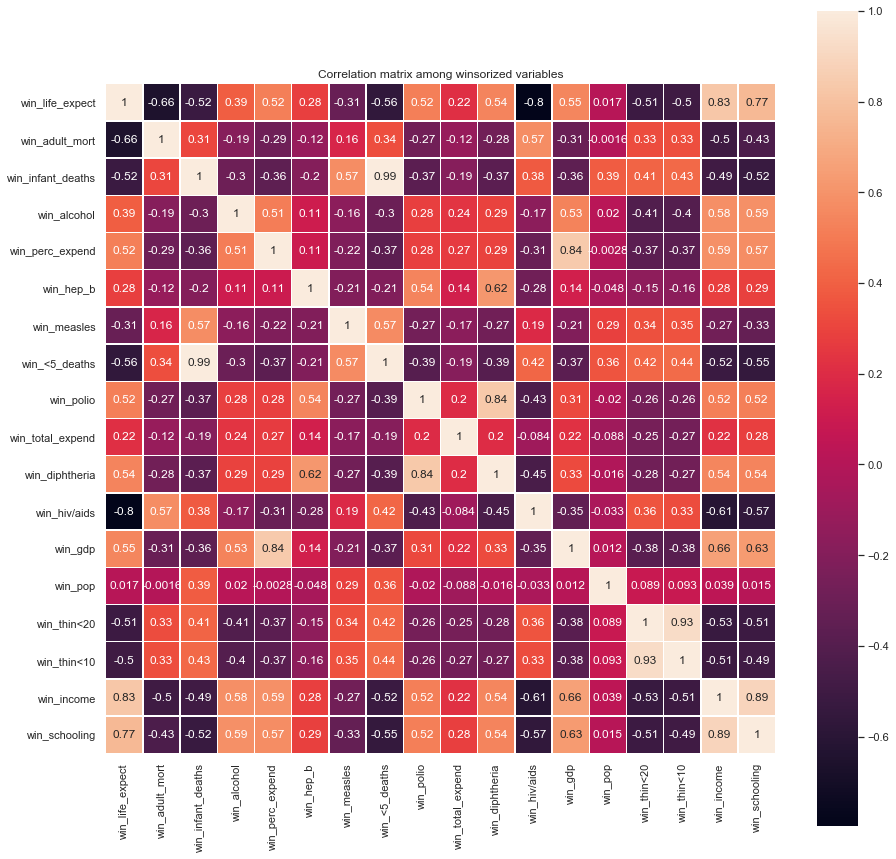

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

Observations:

- `win_income` and `win_schooling` are correlated.
- `win_thin<20` and `win_thin<10` are correlated.
- `win_polio` and `win_diphtheria` are correlated.
- `win_perc_expend` and `win_gdp` are correlated.
- `win_income` and `win_life_expect` are correlated.
- `win_life_expect` and `win-schooling` are correlated.
- `win_infant_deaths` and `win_<5_deaths` are correlated.
- `win_hiv/aids` has negative relation with `win_life_expect`.
- `win_adult_mort` has negative relation with `win_life_expect`.

## Feature Engineering

In [63]:
round(win_life_df[['status','life_expect']].groupby(['status']).mean(),2)

,life_expect
status,
Developed,78.91
Developing,66.35


From the above, developed countries have higher average Life_Expectancy compared to Developing.
Let us find out statistically if this difference is significant.

In [65]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats

stats.ttest_ind(win_life_df.loc[win_life_df['status']=='Developed','life_expect'],
                win_life_df.loc[win_life_df['status']=='Developing','life_expect'])

Ttest_indResult(statistic=23.720859135898525, pvalue=1.502407862645548e-110)

p value is < 0.05

Hence, the difference of `Average_Life_Expectancy` between Developed and Developing countries is significant. We can consider `Status` as a feature as it is related to Life Expectancy.

Let us create a new data frame with feature columns correlated to `life_expect`. As per the correlation heatmap, it
is clear that the following fields are correlated with `win_life_expect`.

- win_schooling
- win_income
- win_hiv/aids
- win_adult_mort

Also it is to be noticed that `win_income` is correlated with `win_schooling`.
All the features should NOT be inter related and hence let us eliminate one of these based on the correlation
value w.r.t. `win_life_expect`.

`wins_income` corr with `win_life_expect` = 0.82<br>
`win_schooling` corr with `win_life_expect` = 0.76<br>
Let us eliminate `win_schooling` as it has relatively low correlation factor. Also, we can choose `status` as an important feature based on the above analysis.

In [80]:
# Create a data frame with features.
feature_df = win_life_df[['status',
                          'win_life_expect',
                          'win_income',
                          'win_hiv/aids',
                          'win_adult_mort']]

In [ ]:
# Convert categorical values to numerical values using one-hot encoding for 'status' feature.
feature_df = pd.concat([feature_df,
                        pd.get_dummies(feature_df['status'],
                                       drop_first=True)],
                       axis=1)
#final = pd.get_dummies(feature_df['status'])
final = feature_df.drop('status',axis=1)

In [84]:
final.head()

,win_life_expect,win_income,win_hiv/aids,win_adult_mort,Developing
0,65.0,0.479,0.1,263.0,1
1,59.9,0.476,0.1,271.0,1
2,59.9,0.470,0.1,268.0,1
3,59.5,0.463,0.1,272.0,1
4,59.2,0.454,0.1,275.0,1


Many machine learning models assume the target variable to be normally distributed. If normality is an assumption non-normal variables can be transformed into normally distributed features using transformations such as taking the square root, the inverse, or the log of the variable, or by applying the Box-Cox transformation.

Also, many machine learning models assume that all features have values in the same range (all features have a min of 0 and max of 1, for example) or they exhibit normal statistical properties. For some techniques, features that vary in range can result in incorrect estimates and results. To be able to apply these techniques and methods, we need to rescale our variables to fit a limited range, or standardize our variables to exhibit some regular statistical patterns. In this case, we can use two concepts of rescaling: normalization and standardization.

In [105]:
Hist_List = ['life_expect', 'win_life_expect', 'win_life_expect',
            'income', 'win_income', 'win_income',
            'hiv/aids', 'win_hiv/aids', 'win_hiv/aids',
            'adult_mort', 'win_adult_mort', 'win_adult_mort']

In [106]:
def VisualHist (df_list):
    size = len(df_list)
    plt.figure(figsize=(round(size/2)*3, 15))
    for i in range(size):
        variable = df_list[i]
        plt.subplot(round(size/3), 3, i+1)
        if (i+1) % 3 != 0:
            plt.hist(win_life_df[variable])
            plt.title("histogram of {}".format(variable))
        else: #Is divisible by 3
            try:
                plt.hist(np.log(win_life_df[variable]))
                plt.title('histogram of log of {}'.format(variable))
            except ValueError:
                plt.hist(win_life_df[variable])
                plt.title('log transformation FAILED')

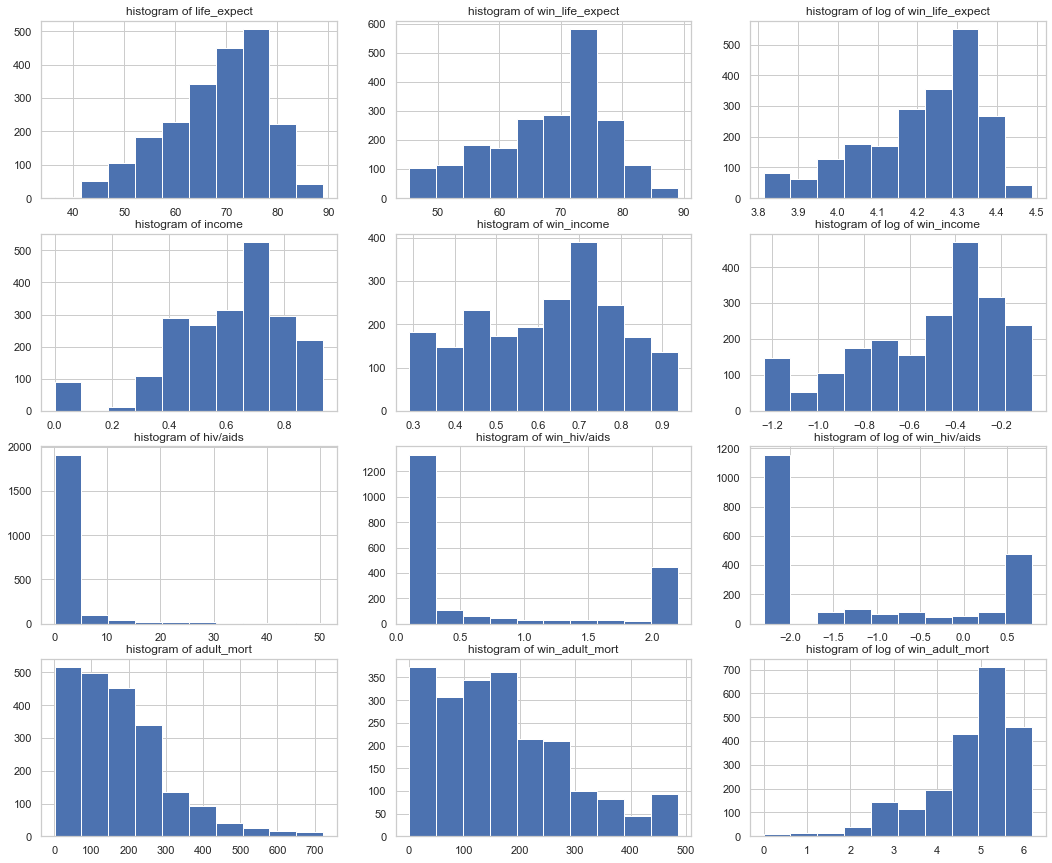

In [107]:
VisualHist(Hist_List)

In [112]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [115]:
def NormalTest(df_list):
    for i in range(len(df_list)):
        variable = df_list[i]
        
        if (i+1) % 3 == 2:
            jb_stats = jarque_bera(np.log(win_life_df[variable]))
            norm_stats = normaltest(np.log(win_life_df[variable]))

            print("Jarque-Bera test for {0} is {1} and p value is {2}".format(variable, jb_stats[0], jb_stats[1]))
            print("Normality test for {0} is {1} and p value is {2}".format(variable, norm_stats[0], norm_stats[1]))

In [116]:
NormalTest(Hist_List)

Jarque-Bera test for win_life_expect is 229.98746234097806 and p value is 0.0
Normality test for win_life_expect is 181.25815222786937 and p value is 4.3680977018283445e-40
Jarque-Bera test for win_income is 211.76113428659778 and p value is 0.0
Normality test for win_income is 177.09584366878272 and p value is 3.500468414925541e-39
Jarque-Bera test for win_hiv/aids is 305.08531777795145 and p value is 0.0
Normality test for win_hiv/aids is 37042.730750768016 and p value is 0.0
Jarque-Bera test for win_adult_mort is 1012.9096481811492 and p value is 0.0
Normality test for win_adult_mort is 494.5783952248147 and p value is 4.0148196645067236e-108


In [117]:
from scipy.stats import boxcox

In [118]:
def BoxCoxHist (df_list):
    size = len(df_list)
    plt.figure(figsize=(round(size/2)*3, 15))
    for i in range(size):
        variable = df_list[i]
        plt.subplot(round(size/3), 3, i+1)
        if (i+1) % 3 != 0:
            plt.hist(win_life_df[variable])
            plt.title("histogram of {}".format(variable))
        else: #Is divisible by 3
            try:
                plt.hist(boxcox(win_life_df[variable]))
                plt.title('histogram boxcox of {}'.format(variable))
            except ValueError:
                plt.hist(win_life_df[variable])
                plt.title('boxcox transformation FAILED')

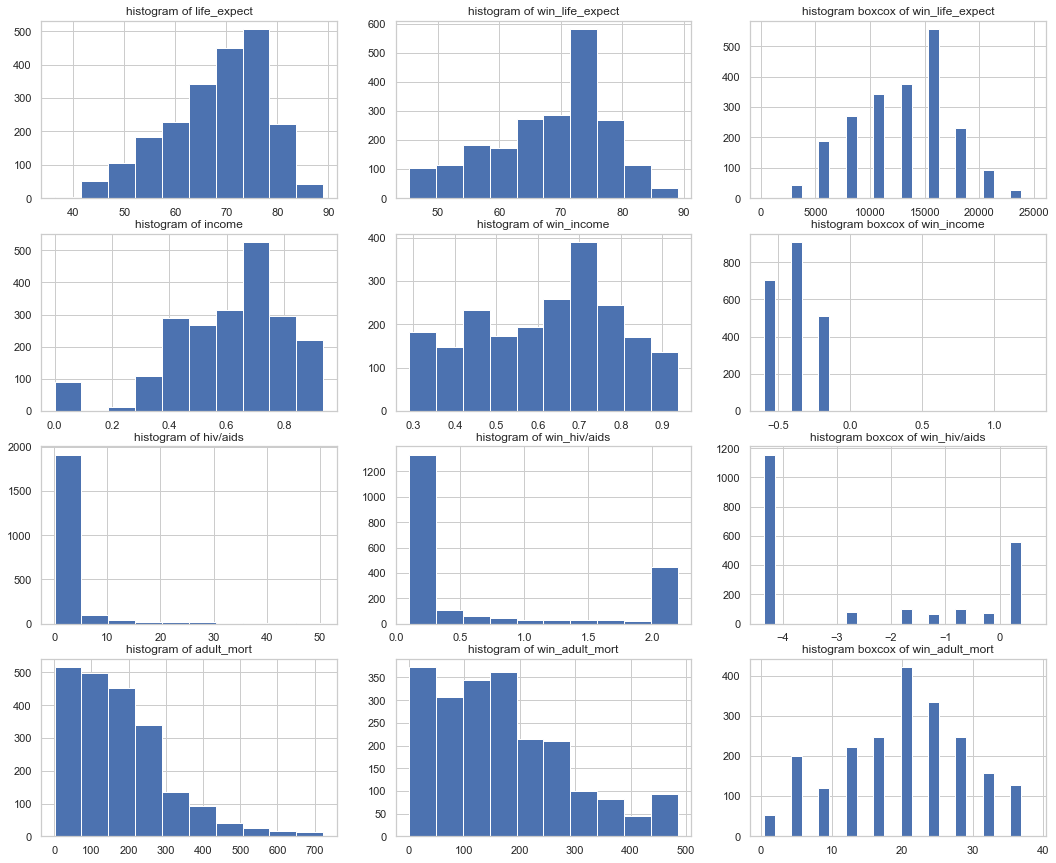

In [119]:
BoxCoxHist(Hist_List)

In [ ]:
+